# 1. 전처리와 통계 분석

## Mbti

### Preprocessing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mbti_data = pd.read_csv('mbti.csv')
mbti_data.drop(['stat','enneagram','img_url'], axis=1, inplace=True)

In [ ]:
mbti_data.head()

,mbti,role,movie
0,ESFP,"Peter Quill ""Star-Lord""",Marvel Cinematic Universe
1,ESFP,Anakin Skywalker,Star Wars
2,ESFP,Ron Weasley,Harry Potter (franchise)
3,ESFP,Bellatrix Lestrange,Harry Potter (franchise)
4,ESFP,Simba,The Lion King (1994)


In [ ]:
mbti_data.describe()

,mbti,role,movie
count,18741,18741,18741
unique,17,15254,3150
top,ESTP,Ben,Star Wars
freq,1578,18,207


In [ ]:
mbti_data.isnull().sum()

mbti     0
role     0
movie    0
dtype: int64

In [ ]:
mbti_data.mbti.unique()

array(['ESFP', 'XXXX', 'ESFJ', 'ESTP', 'ESTJ', 'ENFP', 'ENFJ', 'ENTP',
       'ENTJ', 'ISFP', 'ISFJ', 'ISTP', 'ISTJ', 'INFP', 'INFJ', 'INTP',
       'INTJ'], dtype=object)

XXXX는 특정 지을 수 없는 mbti이므로 삭제

In [ ]:
mbti_data = mbti_data.loc[mbti_data.mbti != 'XXXX']

In [ ]:
mbti_data.drop_duplicates(['role'], inplace=True) # role 중복 제거

### Visualization

In [ ]:
sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (12, 9)

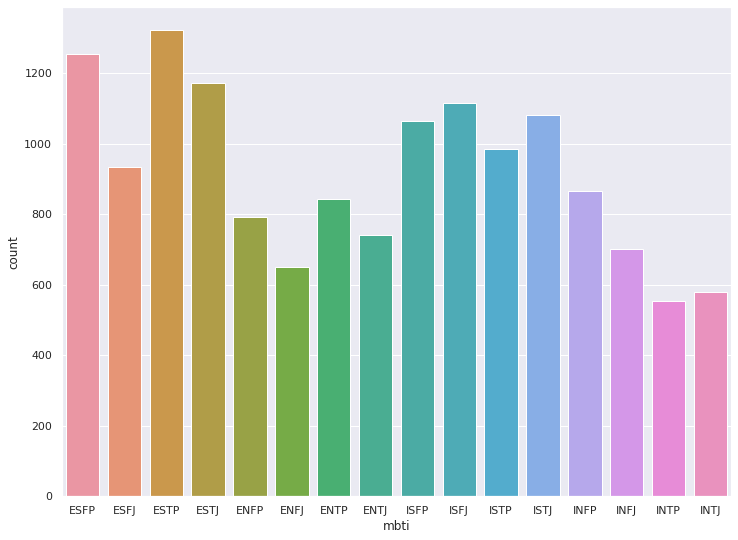

In [ ]:
sns.countplot(x='mbti', data=mbti_data)
plt.show()

In [ ]:
mbti_data['movie'] = mbti_data['movie'].str.lstrip() # 공백 제거

## OTT Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
movie_data = pd.read_csv('OTTMovie.csv')
movie_data.drop(['ID', 'Year', 'Age', 'Type', 'Directors', 'Country', 'Language', 'Runtime' ], axis=1, inplace=True)

In [ ]:
movie_data

,Unnamed: 0,Title,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Genres
0,0,The Irishman,7.8/10,98/100,1,0,0,0,"Biography,Crime,Drama"
1,1,Dangal,8.4/10,97/100,1,0,0,0,"Action,Biography,Drama,Sport"
2,2,David Attenborough: A Life on Our Planet,9.0/10,95/100,1,0,0,0,"Documentary,Biography"
3,3,Lagaan: Once Upon a Time in India,8.1/10,94/100,1,0,0,0,"Drama,Musical,Sport"
4,4,Roma,7.7/10,94/100,1,0,0,0,"Action,Drama,History,Romance,War"
...,...,...,...,...,...,...,...,...,...
9510,9510,Most Wanted Sharks,NaN,14/100,0,0,0,1,"Crime,Reality-TV"
9511,9511,Doc McStuffins: The Doc Is In,NaN,13/100,0,0,0,1,Animation
9512,9512,Ultimate Viking Sword,NaN,13/100,0,0,0,1,NaN
9513,9513,Hunt for the Abominable Snowman,NaN,10/100,0,0,0,1,"Drama,History"


In [ ]:
movie_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            9515 non-null   object
 1   IMDb             9309 non-null   object
 2   Rotten Tomatoes  9508 non-null   object
 3   Netflix          9515 non-null   int64 
 4   Hulu             9515 non-null   int64 
 5   Prime Video      9515 non-null   int64 
 6   Disney+          9515 non-null   int64 
 7   Genres           9399 non-null   object
dtypes: int64(4), object(4)
memory usage: 594.8+ KB


In [ ]:
NNmovie_data = movie_data.dropna(axis=0, how='any')

In [ ]:
NNmovie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9252 entries, 0 to 9501
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            9252 non-null   object
 1   IMDb             9252 non-null   object
 2   Rotten Tomatoes  9252 non-null   object
 3   Netflix          9252 non-null   int64 
 4   Hulu             9252 non-null   int64 
 5   Prime Video      9252 non-null   int64 
 6   Disney+          9252 non-null   int64 
 7   Genres           9252 non-null   object
dtypes: int64(4), object(4)
memory usage: 650.5+ KB


In [ ]:
NNmovie_data['IMDb'] = NNmovie_data['IMDb'].str[0:3:2]
NNmovie_data['Rotten Tomatoes'] = NNmovie_data['Rotten Tomatoes'].str[:2]
NNmovie_data['IMDb'] = NNmovie_data['IMDb'].astype('int64')
NNmovie_data['Rotten Tomatoes'] = NNmovie_data['Rotten Tomatoes'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
NNmovie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9252 entries, 0 to 9501
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            9252 non-null   object
 1   IMDb             9252 non-null   int64 
 2   Rotten Tomatoes  9252 non-null   int64 
 3   Netflix          9252 non-null   int64 
 4   Hulu             9252 non-null   int64 
 5   Prime Video      9252 non-null   int64 
 6   Disney+          9252 non-null   int64 
 7   Genres           9252 non-null   object
dtypes: int64(6), object(2)
memory usage: 650.5+ KB


In [ ]:
movie_data2 = pd.melt(NNmovie_data, id_vars=['Title', 'IMDb', 'Rotten Tomatoes', 'Genres'], var_name="OTT")
movie_data2 = movie_data2[movie_data2.value==1]
movie_data2.drop(['value'], axis=1, inplace=True)

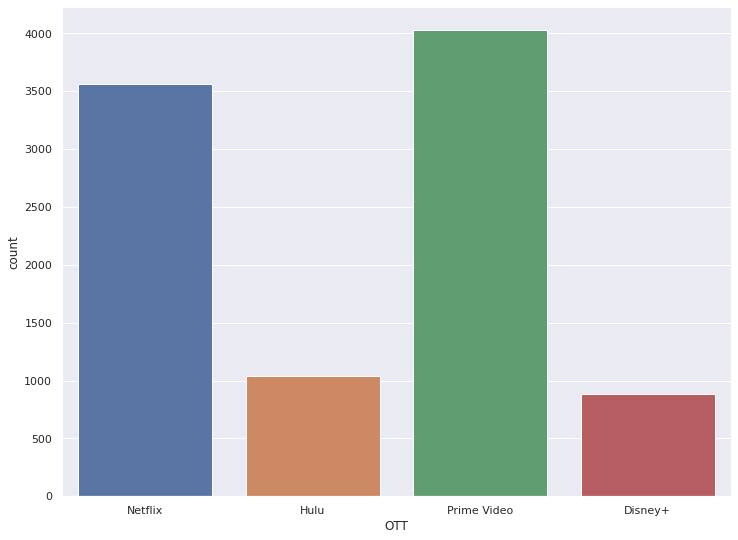

In [ ]:
sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (12, 9)
sns.countplot(x='OTT', data=movie_data2)
plt.show()

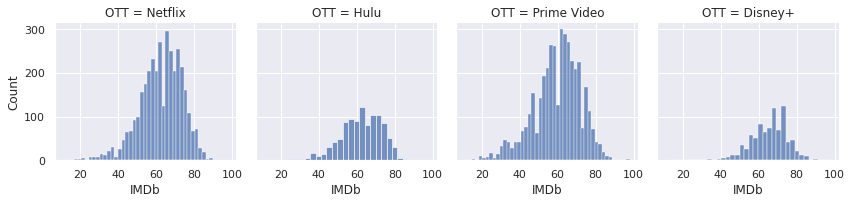

In [ ]:
grid = sns.FacetGrid(movie_data2, col="OTT")
grid.map_dataframe(sns.histplot, x="IMDb")
plt.show()

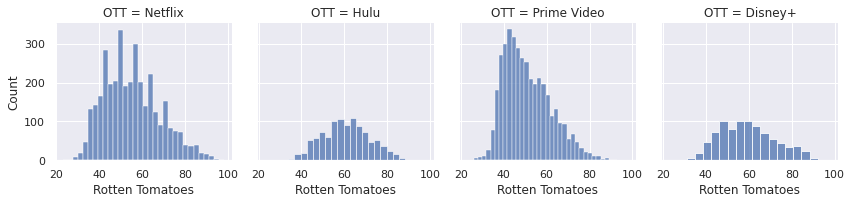

In [ ]:
grid = sns.FacetGrid(movie_data2, col="OTT")
grid.map_dataframe(sns.histplot, x="Rotten Tomatoes")
plt.show()

In [ ]:
grid = movie_data2['Genres'].str.split(',').apply(pd.Series,1).stack()
grid.index = grid.index.droplevel(-1)
grid.name = 'Genres'
del movie_data2['Genres']
genres_data = movie_data2.join(grid)

In [ ]:
genres_data

,Title,IMDb,Rotten Tomatoes,OTT,Genres
0,The Irishman,78,98,Netflix,Biography
0,The Irishman,78,98,Netflix,Crime
0,The Irishman,78,98,Netflix,Drama
1,Dangal,84,97,Netflix,Action
1,Dangal,84,97,Netflix,Biography
...,...,...,...,...,...
37003,Disney Channel Halloween House Party,53,33,Disney+,Musical
37004,Earth Live,52,33,Disney+,Documentary
37005,Wild Uganda,75,32,Disney+,Documentary
37006,Challenge Accepted! Disney Channel's Epic Holi...,39,32,Disney+,Musical


# 2. 데이터 간 합치기

In [ ]:
for title in genres_data['Title'].unique():
  if title.startswith('Pokémon'):
    print(title)

Pokémon the Movie: The Power of Us
Pokémon the Movie: I Choose You!
Pokémon: Mewtwo Strikes Back - Evolution
Pokémon the Movie: Hoopa and the Clash of Ages
Pokémon the Movie: Volcanion and the Mechanical Marvel
Pokémon the Movie: Diancie and the Cocoon of Destruction


In [ ]:
for title in mbti_data['movie'].unique():
  if title.startswith('Pokémon'):
    print(title)

Pokémon: Detective Pikachu (2019)


In [ ]:
mbti_data.groupby('movie').role.count().sort_values(ascending=False)[:30]

movie
Star Wars                                  176
Marvel Cinematic Universe                  172
James Bond                                  92
Harry Potter (franchise)                    82
Toy Story (Franchise)                       71
Jurassic Park / Jurassic World              54
DC Extended Universe                        53
The Fast and the Furious                    43
Transformers (Bayverse)                     42
The Shawshank Redemption (1994)             39
X-Men Cinematic Universe (2011-2020)        38
The Lord of the Rings                       37
The Dark Knight Trilogy                     36
Pirates of the Caribbean                    35
Twilight                                    34
Terminator                                  33
Godzilla                                    32
The Hobbit                                  31
The Godfather                               31
The Hunger Games                            30
Saw (2004)                                  30
Madagas

In [ ]:
same = set(mbti_data.movie.unique()) & set(genres_data.Title.unique())

In [ ]:
checklist = [a for a in mbti_data.movie.unique() if a not in same] # mbti 영화 데이터 중에 겹치지 않는 영화 제목 리스트

In [ ]:
real = dict()
for fix in mbti_data.movie.unique():
  movs = []
  for title in genres_data.Title.unique():
    if title.startswith(fix):
      movs.append(title)
    real[fix] = movs

In [ ]:
real = {key: value for key, value in real.items() if value != []}

In [ ]:
real

{'#Alive': ['#Alive'],
 'A Christmas Princess': ['A Christmas Princess'],
 'A Ghost Story': ['A Ghost Story'],
 'A Princess for Christmas': ['A Princess for Christmas'],
 'Adventures in Babysitting': ['Adventures in Babysitting'],
 'After': ['After',
  'After We Collided',
  'After the Raid',
  'After Maria',
  'After Darkness',
  'After Parkland',
  'After Porn Ends 2',
  'After the Dark',
  'Afternoon Delight',
  'After the Ball',
  'Afterimages',
  'After School'],
 'Alien': ['Alien Xmas',
  'Alien Warfare',
  'Aliens Stole My Body',
  'Alien',
  'Alien Resurrection',
  'Alien Code',
  'Alien Intruder',
  'Aliens of the Deep'],
 'American Animals': ['American Animals'],
 'American Pie': ["American Pie Presents: Girls' Rules"],
 'Ammonite': ['Ammonite'],
 'Ana e Vitória': ['Ana e Vitória'],
 'Arctic Dogs': ['Arctic Dogs'],
 'Austin Powers': ['Austin Powers: International Man of Mystery',
  'Austin Powers: The Spy Who Shagged Me',
  'Austin Powers in Goldmember'],
 "Baby's Day Out": [

 # 3. 두 데이터 Movie Title로 합치기

In [ ]:
genres_data

,Title,IMDb,Rotten Tomatoes,OTT,Genres
0,The Irishman,78,98,Netflix,Biography
0,The Irishman,78,98,Netflix,Crime
0,The Irishman,78,98,Netflix,Drama
1,Dangal,84,97,Netflix,Action
1,Dangal,84,97,Netflix,Biography
...,...,...,...,...,...
37003,Disney Channel Halloween House Party,53,33,Disney+,Musical
37004,Earth Live,52,33,Disney+,Documentary
37005,Wild Uganda,75,32,Disney+,Documentary
37006,Challenge Accepted! Disney Channel's Epic Holi...,39,32,Disney+,Musical


In [ ]:
mbti_data2 = mbti_data.rename(columns={'movie':'Title'})

In [ ]:
mbti_data2

,mbti,role,Title
0,ESFP,"Peter Quill ""Star-Lord""",Marvel Cinematic Universe
1,ESFP,Anakin Skywalker,Star Wars
2,ESFP,Ron Weasley,Harry Potter (franchise)
3,ESFP,Bellatrix Lestrange,Harry Potter (franchise)
4,ESFP,Simba,The Lion King (1994)
...,...,...,...
18733,INTJ,Roman Bridger,Scream
18734,INTJ,Richard Parker,The Amazing Spider-Man (2012)
18736,INTJ,Dr. Caroline Caldwell,The Girl with All the Gifts (2016)
18739,INTJ,Klimek 'The General',The Informer


index 다시 쓰기

In [ ]:
mbti_data2 = mbti_data2.reset_index()
mbti_data2 = mbti_data2.drop('index', axis=1)

In [ ]:
genres_data = genres_data.reset_index()
genres_data = genres_data.drop('index', axis=1)

In [ ]:
data = pd.merge(genres_data, mbti_data2)
data

,Title,IMDb,Rotten Tomatoes,OTT,Genres,mbti,role
0,The Boy Who Harnessed the Wind,76,89,Netflix,Biography,ISFJ,Trywell Kamkwamba
1,The Boy Who Harnessed the Wind,76,89,Netflix,Biography,INTP,William Kamkwamba
2,The Boy Who Harnessed the Wind,76,89,Netflix,Drama,ISFJ,Trywell Kamkwamba
3,The Boy Who Harnessed the Wind,76,89,Netflix,Drama,INTP,William Kamkwamba
4,The Boy Who Harnessed the Wind,76,89,Netflix,History,ISFJ,Trywell Kamkwamba
...,...,...,...,...,...,...,...
2358,Dadnapped,49,51,Disney+,Crime,ISFP,Wheeze
2359,Dadnapped,49,51,Disney+,Family,ESTP,Melissa Morris
2360,Dadnapped,49,51,Disney+,Family,ESTJ,Merv Kilbo
2361,Dadnapped,49,51,Disney+,Family,ENFJ,Neal Morris


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 0 to 2362
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            2363 non-null   object
 1   IMDb             2363 non-null   int64 
 2   Rotten Tomatoes  2363 non-null   int64 
 3   OTT              2363 non-null   object
 4   Genres           2363 non-null   object
 5   mbti             2363 non-null   object
 6   role             2363 non-null   object
dtypes: int64(2), object(5)
memory usage: 147.7+ KB


# 4. MBTI 궁합 점수 함수 만들기

* input으로 사용자 mbti, 장르   
* 장르에 해당하는 영화 추출, 사용자 mbti와 일치하는 영화   
* 영화 리스트 돌면서 unique한 mbti 인물 별 궁합 점수 내기   
* 영화 평점 높은 순   
* 5개 출력하고 제공하는 OTT도 출력

In [ ]:
data.head()

,Title,IMDb,Rotten Tomatoes,OTT,Genres,mbti,role
0,The Boy Who Harnessed the Wind,76,89,Netflix,Biography,ISFJ,Trywell Kamkwamba
1,The Boy Who Harnessed the Wind,76,89,Netflix,Biography,INTP,William Kamkwamba
2,The Boy Who Harnessed the Wind,76,89,Netflix,Drama,ISFJ,Trywell Kamkwamba
3,The Boy Who Harnessed the Wind,76,89,Netflix,Drama,INTP,William Kamkwamba
4,The Boy Who Harnessed the Wind,76,89,Netflix,History,ISFJ,Trywell Kamkwamba


In [ ]:
def movie_list(user_mbti, genre):
  movies = list(set(data.Title[data.mbti == user_mbti]) & set(data.Title[data.Genres == genre]))
  if movies == [] : return None
  else : return movies

In [ ]:
import numpy as np

In [ ]:
mbti_score = np.matrix([
    [1, 1, 1, 2, 1, 2, 1, 1, -2, -2, -2, -2, -2, -2, -2, -2],
    [1, 1, 2, 1, 2, 1, 1, 1, -2, -2, -2, -2, -2, -2, -2, -2],
    [1, 2, 1, 1, 1, 1, 1, 2, -2, -2, -2, -2, -2, -2, -2, -2],
    [2, 1, 1, 1, 1, 1, 1, 1, 2, -2, -2, -2, -2, -2, -2, -2],
    [1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, -1, -1, -1, -1],
    [2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, -1, -1, -1, 2],
    [1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, -1, -1, -1, -1],
    [-2, -2, -2, 2, 0, 0, 0, 0, -1, -1, -1, -1, 0, 2, 0, 2],
    [-2, -2, -2, -2, 0, 0, 0, 0, -1, -1, -1, -1, 2, 0, 2, 0],
    [-2, -2, -2, -2, 0, 0, 0, 0, -1, -1, -1, -1, 0, 2, 0, 2],
    [-2, -2, -2, -2, 0, 0, 0, 0, -1, -1, -1, -1, 2, 0, 2, 0],
    [-2, -2, -2, -2, -1, 0, -1, -1, 0, 2, 0, 2, 1, 1, 1, 1],
    [-2, -2, -2, -2, -1, 0, -1, -1, 2, 0, 2, 0, 1, 1, 1, 1],
    [-2, -2, -2, -2, -1, 0, -1, -1, 0, 2, 0, 2, 1, 1, 1, 1],
    [-2, -2, -2, -2, -1, 0, 2, -1, 2, 0, 2, 0, 1, 1, 1, 1]
])

In [ ]:
mbti_all = dict(
    INFP=0,
    ENFP=1,
    INFJ=2,
    ENFJ=3,
    INTJ=4,
    ENTJ=5,
    INTP=6,
    ENTP=7,
    ISFP=8,
    ESFP=9,
    ISTP=10,
    ESTP=11,
    ISFJ=12,
    ESFJ=13,
    ISTJ=14,
    ESTJ=15
)

In [ ]:
M = input("What is your mbti?> ")

What is your mbti?> ISFJ


In [ ]:
g = input("Which genre do you want to watch?> ")

Which genre do you want to watch?> Biography


In [ ]:
mlist = movie_list(M, g)
print(mlist)

['American Animals', 'War Dogs', 'Ip Man', 'The Boy Who Harnessed the Wind']


In [ ]:
ex = data.mbti[data.Title == mlist[0]].unique()
ex

array(['ESTP', 'ENFP', 'ISFJ', 'INTJ'], dtype=object)

예1
ISFJ&ISFJ=1
ISFJ&INTP=-1
1 + (-1) = 0

In [ ]:
def sum_score(user_mbti, movies_list):
  L = []
  a = mbti_all.get(user_mbti)
  for i in range(len(movies_list)):
    s = 0
    n = data.mbti[data.Title == movies_list[i]].unique()
    for j in range(len(n)):
      b = mbti_all.get(n[j])
      s += mbti_score.A[a][b]
    L.append(s)
  return L

In [ ]:
sum_score(M, mlist)

[0, 2, 7, 0]

In [ ]:
data.rename(columns={'Rotten Tomatoes':'Rotten_Tomatoes'}, inplace=True)


In [ ]:
def recommended_movie(user_mbti, movie_list) :
  scores = sum_score(user_mbti, movie_list)
  
  for i in range(len(movie_list)) :
    scores[i] += data.IMDb[data.Title == movie_list[i]].unique()
    scores[i] += data.Rotten_Tomatoes[data.Title == movie_list[i]].unique()
  
  idx = np.argmax(scores)
  ott = data.OTT[data.Title==movie_list[idx]].unique()
  ott_name = ""

  for i in ott :
    ott_name += i
    ott_name += " "

  print("Recommended Movie : {} , Serviced by : {}".format(movie_list[idx], ott_name))
  


In [ ]:
recommended_movie(M, mlist)

Recommended Movie : Ip Man , Serviced by : Netflix 
